# Numerična matematika - domača naloga 2
Gregor Kovač

# 1. Naloga s funkcijo
## Porazdelitvena funkcija normalne slučajne spremenljivke 

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from normal import std_normal_integral, std_normal
from hipotrohoida import *

In [8]:
std_normal(-10**1)

7.69459862670642e-23

In [3]:
print(f"My solution: {std_normal_integral(1, n = 1000000):.10f}")
print(f"Scipy {norm.cdf(1):.10f}")

My solution: 0.8413447461
Scipy 0.8413447461


## 2. Naloga s števili
### Ploščina hipotrohoide

In [2]:
p = np.linspace(0, 2 * np.pi, 100)

x = lambda t: np.cos(t)
y = lambda t: np.sin(t)
dx = lambda t: -np.sin(t)
dy = lambda t: np.cos(t)

P = trikotnik(x, y, dx, dy, 0, 2 * np.pi, n = 10)

if P == np.pi:
    print("Površina, izračunana s trikotniki, je enaka površini kroga.")
    print(f"{P:.10f} == {np.pi:.10f}")
else:
    print("Površina, izračunana s trikotniki, ni enaka površini kroga.")
    print(f"{P:.10f} != {np.pi:.10f}")

Površina, izračunana s trikotniki, je enaka površini kroga.
3.1415926536 == 3.1415926536


14.260211124648587


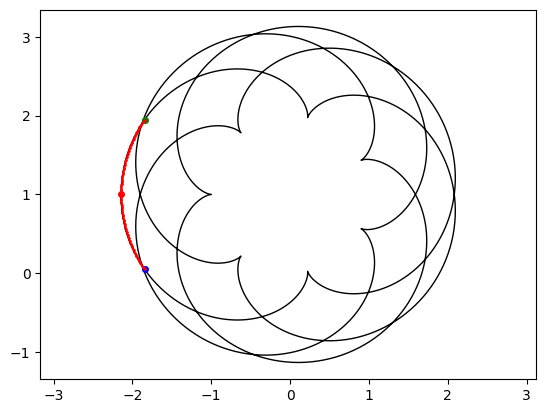

In [7]:
p = np.linspace(0, 70, 1000)

a = 1
b = - 11/7

res = h(p)

# print(trikotnik(hx, hy, dhx, dhy, 0, 70, n = 1000))

vals = []
biggest_self_intersection_norm = 0

# for i in range(res.shape[1]):
#     xr = res[0][i]
#     yr = res[1][i]
#     nrm = np.linalg.norm(np.array([xr, yr]))

#     for v in vals:
#         if np.abs(nrm - v) < 0.001:
#             plt.plot(xr, yr, 'ro', markersize = 2)
#             break
    # vals.append(nrm)
    

# plt.plot(res[0], res[1], 'k')
# for i in range(res.shape[1]):
#     plt.plot(res[0][i], res[1][i], 'bo', markersize = 1)

# x_circ = lambda t: a * np.cos(t)
# y_circ = lambda t: a * np.sin(t)
# plt.plot(x_circ(p), y_circ(p), 'b')

# x_circ = lambda t: (a) * np.cos(t)
# y_circ = lambda t: (a) * np.sin(t)
# plt.plot(x_circ(p), y_circ(p), 'r', linewidth = 1)

# # Only keep res that are outside the circle
filtered = []
for i in range(res.shape[1]):
    xr = res[0][i]
    yr = res[1][i]
    nrm = np.linalg.norm(np.array([xr, yr]))

    if nrm > -b:
        filtered.append([xr, yr])

filtered = np.array(filtered).T
# for i in range(filtered.shape[1]):
#     plt.plot(filtered[0][i], filtered[1][i], 'ko', markersize = 1)
# plt.plot(filtered[0], filtered[1], 'k', linewidth = 1)
plt.plot(res[0], res[1], 'k', linewidth = 1)

# tmax = 0
# hmax = h(tmax)
# hmaxnorm = np.linalg.norm(hmax)
# plt.plot(hmax[0], hmax[1], 'ro', markersize = 5)

P = 0

# t_side = []
outer_t = np.array([])
for ni in range(0, 14, 2):
    ni = ni
    t_s = (11 * np.pi * ni) / 7
    t_s_l = (11 * np.pi * (ni + 2/11)) / 7
    t_s_r = (11 * np.pi * (ni - 2/11)) / 7
    # t_side.append(t_s)

    h_side = h(t_s)
    h_side_l = h(t_s_l)
    h_side_r = h(t_s_r)

    h_side_norm = np.linalg.norm(h_side).round(10)
    h_side_l_norm = np.linalg.norm(h_side_l).round(10)
    h_side_r_norm = np.linalg.norm(h_side_r).round(10)

    # print(h_side_norm, h_side_l_norm, h_side_r_norm)

    # outer_t = np.append(outer_t, np.linspace(prev_t_side, t_side, 10))
    # outer_t = np.append(outer_t, t_side)
    # prev_t_side = t_side
    # print(h_side_norm)
    plt.plot(h_side[0], h_side[1], 'ro', markersize = 4)
    plt.plot(h_side_l[0], h_side_l[1], 'bo', markersize = 4)
    plt.plot(h_side_r[0], h_side_r[1], 'go', markersize = 4)

    trik = trikotnik(hx, hx, dhx, dhy, t_s_l, t_s_r, n = 100)

    P += np.abs(trik)

    lnsp = np.linspace(t_s_l, t_s_r, 100)
    for l in lnsp:
        h_sq = h(l)
        plt.plot(h_sq[0], h_sq[1], 'ro', markersize = 1)

    break

P *= 7

print(P)

# angles = []
# for t in t_side:
#     h_t = h(t)
#     angle = np.arctan2(h_t[1], h_t[0])
#     angles.append(angle)

# # Sort t_side by angle
# t_side = [x for _, x in sorted(zip(angles, t_side))]

# print(angles)

# t_outer = np.array([])
# for i in range(len(t_side) - 1):
#     t_outer = np.append(t_outer, np.linspace(t_side[i], t_side[i + 1], 10))
#     break

# for t in t_outer:
#     h_side = h(t)
#     plt.plot(h_side[0], h_side[1], 'ro', markersize = 4)

# for t in outer_t:
#     h_side = h(t)
#     plt.plot(h_side[0], h_side[1], 'ro', markersize = 4)

# t_side = -11/7
# h_side = h(t_side)
# h_side_norm = np.linalg.norm(h_side)
# plt.plot(h_side[0], h_side[1], 'bo', markersize = 5)

# x_circ = lambda t: hmaxnorm * np.cos(t)
# y_circ = lambda t: hmaxnorm * np.sin(t)
# plt.plot(x_circ(p), y_circ(p), 'r', linewidth = 1)

plt.axis('equal')


plt.show()

In [12]:
np.pi * 2.1428571429 ** 2

14.425680552775058